In [61]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

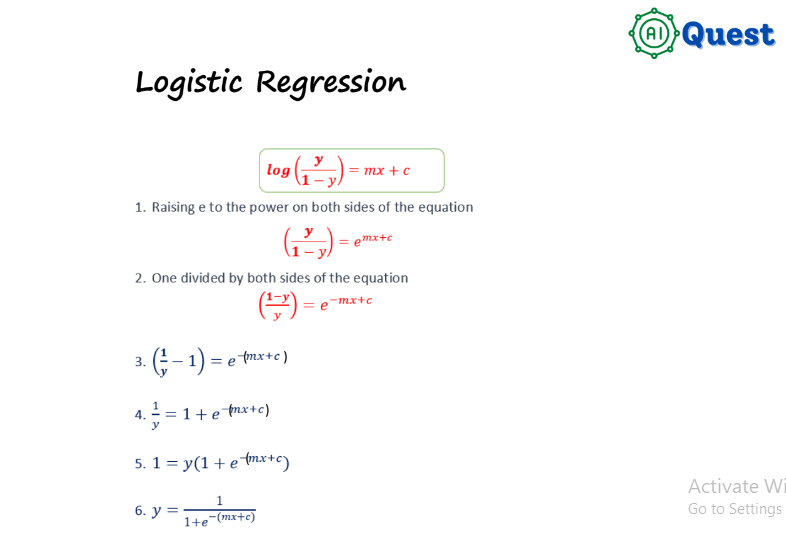

In [62]:
from IPython.display import Image
Image('Logistic_Regreesion.png')

In [63]:
df = pd.read_csv('shoe.csv')

In [64]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


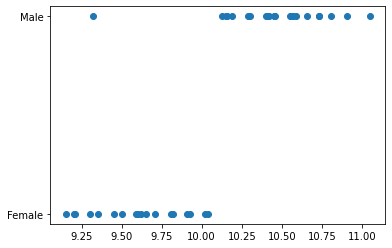

In [65]:
plt.scatter(df['size(cm)'],df['class(y)'])

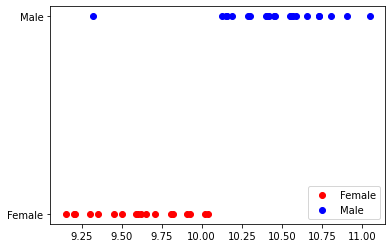

In [66]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'],df0['class(y)'],color = 'red', label = 'Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color = 'blue', label = 'Male')

plt.legend()

# Data Preprocessing

In [67]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])

In [68]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']],df['class(y)'],test_size=.30)

In [71]:
xtrain.head()

,size(cm)
39,9.32
28,10.45
37,10.56
10,9.82
4,11.05


In [72]:
ytrain.head()

39    1
28    1
37    1
10    0
4     1
Name: class(y), dtype: int64

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
reg = LogisticRegression()

In [75]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [76]:
reg.coef_

array([[2.08024013]])

In [77]:
reg.intercept_

array([-20.57252681])

In [78]:
reg.predict_proba(xtest)

array([[0.59227911, 0.40772089],
       [0.1953505 , 0.8046495 ],
       [0.62203848, 0.37796152],
       [0.7138706 , 0.2861294 ],
       [0.10689157, 0.89310843],
       [0.2019733 , 0.7980267 ],
       [0.29860564, 0.70139436],
       [0.65090599, 0.34909401],
       [0.82322177, 0.17677823],
       [0.18889347, 0.81110653],
       [0.47894803, 0.52105197],
       [0.16758604, 0.83241396]])

In [79]:
reg.predict(xtest)

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [80]:
ytest

8     0
7     1
9     0
6     0
13    1
14    1
18    1
33    0
5     0
19    1
17    0
23    1
Name: class(y), dtype: int64

In [81]:
logistic = reg.score(xtest, ytest)
logistic

0.9166666666666666

# Applining KNN Regression

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(xtrain,ytrain)

KNeighborsRegressor()

In [84]:
knn_pred = neigh.predict(xtest)
knn_pred

array([0. , 1. , 0. , 0.2, 1. , 1. , 1. , 0. , 0.2, 1. , 0. , 1. ])

# Evaluate Model

In [85]:
accuracy = r2_score(ytest,knn_pred)
accuracy

0.9733333333333334

In [86]:
lst = [['logistic'],['accuracy']]

In [87]:
df = pd.DataFrame(lst)

In [88]:
df.head()

,0
0,logistic
1,accuracy


In [89]:
df = pd.DataFrame(
    {
        'Logistic_Regression': [logistic],
        'Accuracy': [accuracy]
    }
)

In [90]:
df

,Logistic_Regression,Accuracy
0,0.916667,0.973333


In [91]:
%matplotlib inline

<AxesSubplot:>

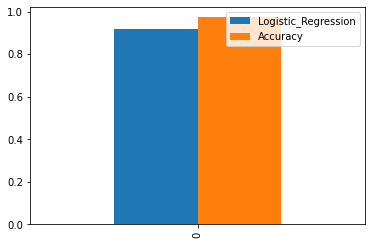

In [94]:
df.plot.bar()

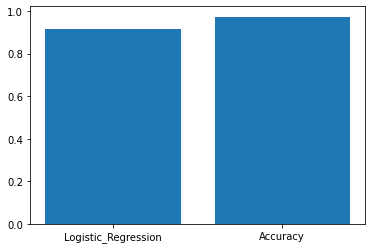

In [93]:
x = ['Logistic_Regression','Accuracy']
y = [logistic,accuracy]
plt.bar(x,y)
plt.show()